# Manufacturing Defects (28 points)

#### Authors

In [3]:
#import packages here
import numpy as np
import matplotlib.pyplot as plt

#### In previous notebooks you have already explored the importance of manufacturing parameters and curing cycles, specifically the Cure kinetics and Rheokinetics of composite production. The manufacturing process plays a crucial role when we try to guarantee a predictable part quality.

#### In this notebook you will be working on cases for which manufacturing did not reach the expected and predicted quality or, in other words, manufacturing related defects have been detected.

#### Understanding defects is an important part of composite manufacturing. Defects can (and will) occur during most manufacturing processes. You will learn to recognise defects, assess data for components with and without defects, how to deal with shrinkage of polymeric matrices, how to use image analysis to assess defects in fabric weaves, and reflect on the consequences of defects.

#### Defects in composites can be generally classified as one of the types shown in the graph (Figure 1) below.

<img src="defect_types.png" width="500" height="340">

Figure 1

### Question 1 (3 points)

#### A case study will be used in this question to start approaching the problem of defects. In this case you will be considering the implosion of the Titan Submersible. Titan imploded during an expedition to the Titanic in June 2023, killing all five occupants Upon news of the fate of Titan, the company closed its Everett office indefinitely. Soon after the implosion, its subsidiary OceanGate Expeditions also suspended operations. From July 2023, OceanGate's websites defaulted to a message advising: "OceanGate has suspended all exploration and commercial operations."

#### As a first step, please read carefully the article provided with this notebook:
#### Kramer, D., & Otin, S. (2024, July 5). Materials Laboratory Factual Report. National Transportation Safety Board.

#### Question 1.1: Read Section 1.0 of the report on "Composite hull manufacturing and vessel assembly". Identify and describe an ex-ante monitoring process used by OceanGate and specify the defect type.

Answer: The ex-ante monitoring process used by OceanGate during assembly process is the contact-angle measurement during surface preparation, when preparing to bond the composite hull to the CP Grade-3 machined titanium segments. After degreasing with MEK and roughening with stearate-free sandpaper, contatc angle was measured to ensure that the surface was "active" (i.e., clean and no contamination). Filtered shop air were used to blow away particulates, which is again tested by contact angle to ensure it did not introduce contamination. This is classified as monitoring as contact angle measurements are used as a metric for the surface clealiness and surface energy, and this affects whether the adhesive will properly wet and bond to surface. Defect type is classified under "External: Contamination" according to the chart above. Bond interface contamination leads to adhesive bonding defect, cause catastrophic delamination under pressure due to the weak bonds at surface interface.


Wrinkle formation in carbon fiber plies during the formation process, which is believed to cause premature implosion. The hull was equipped with real-time monitoring (RTM) system. The system comprised eight acoustic emission (AE) sensors, eight circumferential (hoop) strain gages, and eight longitudinal (axial) strain gages. During a dive, acoustic events were continuously monitored but not accumulated between successive dives. Warning levels and 'hit' decibel levels were statistically established using AE data from imploded test articles. 

#### Question 1.2: Propose an in-situ and an ex-post detection method to identify the defect discussed in Q1.1.

Answer: Ultrasonic NDT can be used as a ex-post detection method. The adhesive joint is scanned to detect debonding, weak bond regions or any irregularities. Contamination often result in poor adhesion that is detectable through scanning and this method is one the moset widely used methods to monitor bonded joints. Therefore, it has reliability in this aspect. 

#### Question 1.3: The following images (Figure 2a, 2b, 2c) have been discussed in the report. Classify them as fibre, matrix, process or external defects and discuss possible causes of these defects.

Note: Refer to the original pictures in the report for better quality.

<div style="display: flex; justify-content: center; align-items: center; gap: 2px;">
    <figure style="text-align: center;">
        <img src="2a.png" width="600" height="400">
        <figcaption>Figure 2a</figcaption>
    </figure>
    <figure style="text-align: center;">
        <img src="2b.png" width="600" height="400">
        <figcaption>Figure 2b</figcaption>
    </figure>
</div>

<div style="display: flex; justify-content: center; align-items: center; gap: 2px;">
    <figure style="text-align: center;">
        <img src="2c.png" width="600" height="400">
        <figcaption>Figure 2c</figcaption>
    </figure>
</div>

Answer: Figure 2a is a process defect, as can be seen in the porosity and exposed matrix(glossy) regions. Porosity is possibly caused by the trapped air bubbles and insufficient consolidation during the AFP layup process as a result of poor compaction. Moreover, another likely cause of the porosity is during the autoclave process, there may be insufficient pressure or leaks. Handling damage or usage may have caused an open-up near the surface and expose plies.
Figure 2b is a fibre defect, as can be seen in the delamination between layers. This may be caused by the defect mentioned in Question 1.1 due to contamination that results in weak bonding at the co-bond interface, which may be caused by residue, dust etc. The fact that 1-inch layers were co-bonded suggests that interlaminar stresses may also have been amplified more than usual to enhance delamination. 
Figure 2c is an external defect,  

### Question 2 (2 points)

#### Free shrinkage and residual stresses

#### Additional defects that can occur in composites include micro-cracks, typically emerging from the combination of residual stresses with thermal cycling or mechanical loading. The primary cause of residual stresses at a micro-mechanical level is the disparity in shrinkage between the fibers and the matrix. Specifically, the polymer matrix tends to undergo considerably more shrinkage (dictated by the coefficient of thermal expansion, CTE) during consolidation and cooling compared to the contracting fibers.

<img src="shrinkage UD.png" width="600" height="400">

Figure 3

#### In this question we will work towards identifying the differences in shrinkage characteristics of two different thermoplastics (an amorphous and a semi-crystalline polymer). Draw typical storage modulus vs. temperature graphs for both categories. Display them in two different graphs. Explain the evolution of mechanical properties, including: how the storage modulus evolves as a function of temperature. Also identify and explain the differences in relevant temperature points and ranges along the curve - structural range, processing range, free volume evolution, melting and glass transition points between the 2 graphs.

Answer: As can be seen in the graph, amorphous thermoplastics do not have a sharp melting point,  

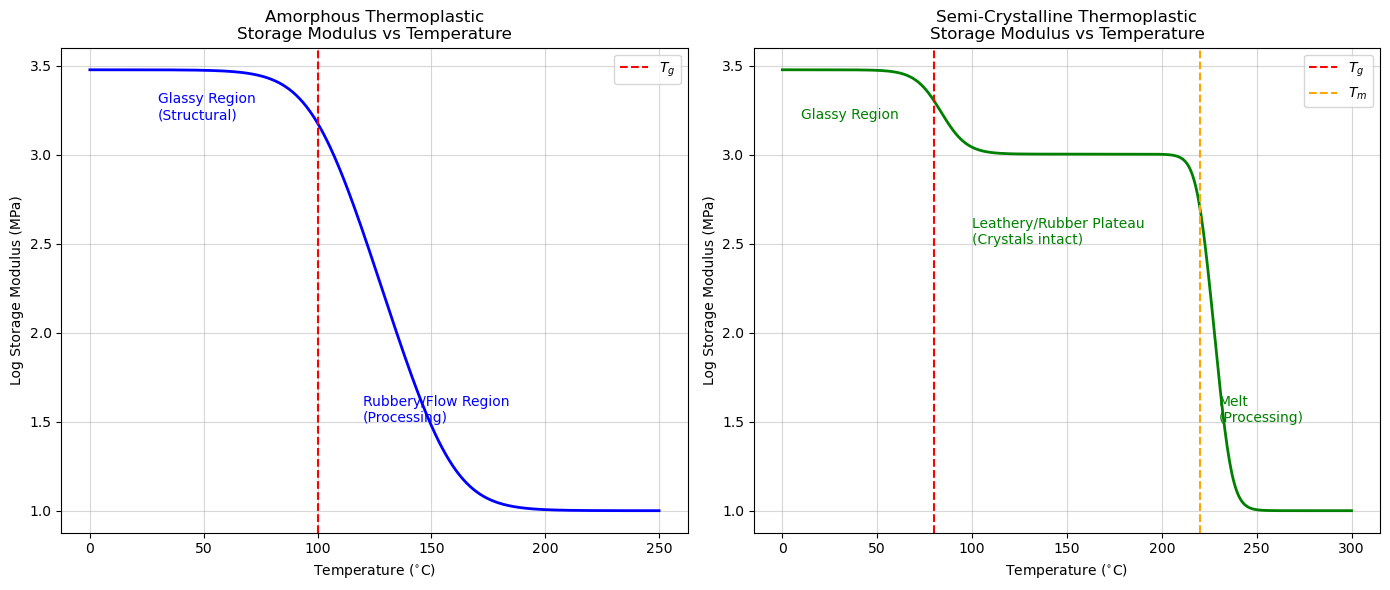

In [4]:
T_amorphous = np.linspace(0, 250, 500)
E_amorphous = 3000 * (1 / (1 + np.exp(0.1 * (T_amorphous - 100)))) + 10 
E_amorphous_log = np.log10(E_amorphous) 

T_semicrys = np.linspace(0, 300, 500)
Tg_sc = 80
Tm_sc = 220
def semi_crys_modulus(t):
    val = 3000 
    if t > Tg_sc:
        val = 1000 # Drop to intermediate
    if t > Tg_sc and t < Tm_sc:
        val = 1000 - 2 * (t - Tg_sc)
    if t >= Tm_sc:
        val = 10 
    return val

E_semicrys = []
for t in T_semicrys:
    # Sigmoid for Tg
    term1 = 2000 / (1 + np.exp(0.15 * (t - Tg_sc))) 
    # Sigmoid for Tm (remaining stiffness drops)
    term2 = 1000 / (1 + np.exp(0.3 * (t - Tm_sc)))
    E_semicrys.append(term1 + term2 + 10)
E_semicrys = np.array(E_semicrys)
E_semicrys_log = np.log10(E_semicrys)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(T_amorphous, E_amorphous_log, 'b-', linewidth=2)
ax1.set_title('Amorphous Thermoplastic\nStorage Modulus vs Temperature')
ax1.set_xlabel('Temperature ($^{\circ}$C)')
ax1.set_ylabel('Log Storage Modulus (MPa)')
ax1.axvline(x=100, color='r', linestyle='--', label='$T_g$')
ax1.text(30, 3.2, 'Glassy Region\n(Structural)', fontsize=10, color='blue')
ax1.text(120, 1.5, 'Rubbery/Flow Region\n(Processing)', fontsize=10, color='blue')
ax1.grid(True, which="both", ls="-", alpha=0.5)
ax1.legend()

ax2.plot(T_semicrys, E_semicrys_log, 'g-', linewidth=2)
ax2.set_title('Semi-Crystalline Thermoplastic\nStorage Modulus vs Temperature')
ax2.set_xlabel('Temperature ($^{\circ}$C)')
ax2.set_ylabel('Log Storage Modulus (MPa)')
ax2.axvline(x=80, color='r', linestyle='--', label='$T_g$')
ax2.axvline(x=220, color='orange', linestyle='--', label='$T_m$')
ax2.text(10, 3.2, 'Glassy Region', fontsize=10, color='green')
ax2.text(100, 2.5, 'Leathery/Rubber Plateau\n(Crystals intact)', fontsize=10, color='green')
ax2.text(230, 1.5, 'Melt\n(Processing)', fontsize=10, color='green')
ax2.grid(True, which="both", ls="-", alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

### Question 3 (4 points)

#### When dealing with TP consolidation cycles, understanding shrinkage and the potential occurrence of residual stresses in a part is crucial when dealing with the design of consolidation cycles for thermoplastic composites.

#### For the production and autoclave consolidation of a 1 m wide and 2 m long panel using a single unidirectional lamina, two carbon fibre thermoplastic prepregs are under consideration: one with a Polycarbonate matrix and the other with a Polyamide matrix, both utilizing T1000 UD as the reinforcement. It concerns a zero-bleed prepreg with a fibre volume fraction of 55%. The consolidation cycle involves a 200°C dwell, maintained for 1 hour, followed by a cooling phase at 2°C/min until reaching room temperature (20°C). The consolidation cycle is shown in Figure 4 (the heating phase is not shown, as it is not relevant for this question). Equations and assumption that will help you answer the questions, are given below.

#### The longitudinal coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows: 
$$\alpha_{l} = \frac{(1-\nu_{f})E_{r}\alpha_{r}+ \nu_{f}E_{lf} \alpha_{lf}}{(1-\nu_{f})E_{r} +\nu_{f}E_{lf}}$$
#### The transverse coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows:
$$\alpha_{t} = (1-\nu_{f})\alpha_{r}+ \nu_{f}\alpha_{tf} +(1-\nu_{f})\alpha_{r}\nu_{r} +\nu_{12f}\alpha_{lf}\nu_{f} -\nu_{12}\alpha_{l}$$

#### Where $\nu_{f}$ represents fibre volume content, $E_{r}$ [GPa] Young's modulus of the matrix, $\nu_{r}$ the Poisson ratio of the matrix, $\alpha_{r}$ [1/°C] coefficient of linear thermal expansion of the matrix, $\alpha_{lf}$ [1/°C] and $\alpha_{tf}$ [1/°C] thermal expansion coefficients (CLTE) of fibres in the longitudinal and transverse direction, $E_{lf}$ [GPa] the longitudinal Young's modulus of the fibres, $\nu_{12}$ the in-plane Poisson ratio of the lamina and $\nu_{12f}$ Poisson’s ratio of the fibres.

#### The thermal strain (in longitudinal and transverse direction) can be calculated as follows: 
#### $$\epsilon = \int_{0}^{t} \alpha(t)\Delta Tdt$$

| Matrix        | Young's modulus [GPa] | Poisson ratio | CLTE [1/°C]          |
|---------------|-----------------------|---------------|----------------------|
| Polycarbonate | 1.4                   | 0.37          | $70.2 \cdot 10^{-6}$ |
| Polyamide 6   | 3                     | 0.39          | $85 \cdot 10^{-6}$   |

<img src="Cure cycle.jpg" width="1000" height="600">

Figure 4

<img src="defect_types.png" width="500" height="340">

Figure 1

#### The following assumptions are made:
#### - The lamina undergoes free shrinkage
#### - The properties of the resin and fibers, including volume fraction (vf), Poisson's ratio, and coefficient of linear thermal expansion (CLTE), are non-temperature dependent.
#### - Poisson ratio of the lamina can be derived using the rule of mixtures


#### Question 3.1: Given the provided equations, material properties, consolidation cycle, and the listed assumptions, please calculate:
#### - the composite material's linear coefficient of thermal expansion (in longitudinal and transverse direction).
#### - the expected strain after reaching room temperature in both length and width direction of the panel
#### - the percentage of shrinkage in length and width direction of the panel


#### Note - You may use Kulkarni R, Ochoa O. Transverse and Longitudinal CTE Measurements of Carbon Fibers and their Impact on Interfacial Residual Stresses in Composites. Journal of Composite Materials. 2006;40(8):733-754. doi:10.1177/0021998305055545 as reference for material data.

Answer:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

vf = 0.55  # fiber volume fraction (55%)
# Panel dimensions 
L = 2.0  # fiber direction
W = 1.0 

T_dwell = 200.0  
T_room  = 20.0   
dT = T_room - T_dwell  

# Fiber (T1000 UD) properties (example literature-typical values)
E_lf = 294.0   # GPa (longitudinal Young's modulus of fiber)
alpha_lf = -0.6e-6  # 1/°C (fiber longitudinal CLTE)
alpha_tf =  3.8e-6  # 1/°C (fiber transverse CLTE)
nu_12f = 0.20       # fiber Poisson ratio (typical)

# Matrix candidates (from your table)
matrices = {
    "Polycarbonate": {"E_r": 1.4, "nu_r": 0.37, "alpha_r": 70.2e-6},
    "Polyamide 6":   {"E_r": 3.0, "nu_r": 0.39, "alpha_r": 85.0e-6},
}

# -----------------------------
# Functions (from given equations)
# -----------------------------
def nu12_rule_of_mixtures(vf, nu12f, nu_r):
    """Assumption: lamina Poisson ratio from rule of mixtures."""
    return vf * nu12f + (1 - vf) * nu_r

def alpha_longitudinal(vf, E_r, alpha_r, E_lf, alpha_lf):
    """
    alpha_l = ((1-vf)E_r*alpha_r + vf*E_lf*alpha_lf) / ((1-vf)E_r + vf*E_lf)
    Using GPa consistently is fine because it's a ratio.
    """
    num = (1 - vf) * E_r * alpha_r + vf * E_lf * alpha_lf
    den = (1 - vf) * E_r + vf * E_lf
    return num / den

def alpha_transverse(vf, alpha_r, alpha_tf, nu_r, nu12f, alpha_lf, nu12, alpha_l):
    """
    alpha_t = (1-vf)*alpha_r + vf*alpha_tf + (1-vf)*alpha_r*nu_r
              + nu12f*alpha_lf*vf - nu12*alpha_l
    """
    return ((1 - vf) * alpha_r
            + vf * alpha_tf
            + (1 - vf) * alpha_r * nu_r
            + nu12f * alpha_lf * vf
            - nu12 * alpha_l)

# -----------------------------
# Calculations
# -----------------------------
rows = []
for name, props in matrices.items():
    E_r = props["E_r"]         # GPa
    nu_r = props["nu_r"]
    alpha_r = props["alpha_r"] # 1/°C

    nu12 = nu12_rule_of_mixtures(vf, nu_12f, nu_r)

    a_l = alpha_longitudinal(vf, E_r, alpha_r, E_lf, alpha_lf)
    a_t = alpha_transverse(vf, alpha_r, alpha_tf, nu_r, nu_12f, alpha_lf, nu12, a_l)

    # Free thermal strains (alpha assumed constant)
    eps_l = a_l * dT
    eps_t = a_t * dT

    # Percentage "shrinkage" (signed; negative means shrink, positive means expansion)
    shrink_l_pct = 100.0 * eps_l
    shrink_t_pct = 100.0 * eps_t

    # Absolute dimensional change
    dL = eps_l * L
    dW = eps_t * W

    rows.append({
        "Matrix": name,
        "alpha_l (1/C)": a_l,
        "alpha_t (1/C)": a_t,
        "eps_l": eps_l,
        "eps_t": eps_t,
        "shrink_l (%)": shrink_l_pct,
        "shrink_t (%)": shrink_t_pct,
        "deltaL (m)": dL,
        "deltaW (m)": dW,
    })

df = pd.DataFrame(rows)

# Friendly formatting
pd.set_option("display.float_format", lambda x: f"{x:.6e}")
print("Cooling deltaT =", dT, "Celsius\n")
print(df)

# If you prefer mm for dimensional change:
df_mm = df.copy()
df_mm["deltaL (mm)"] = df_mm["deltaL (m)"] * 1e3
df_mm["deltaW (mm)"] = df_mm["deltaW (m)"] * 1e3
print("\nDimensional change in mm:")
print(df_mm[["Matrix", "deltaL (mm)", "deltaW (mm)"]])

Cooling deltaT = -180.0 Celsius

          Matrix  alpha_l (1/C)  alpha_t (1/C)         eps_l         eps_t  \
0  Polycarbonate  -3.252264e-07   4.539223e-05  5.854075e-05 -8.170601e-03   
1    Polyamide 6   1.087397e-07   5.516045e-05 -1.957314e-05 -9.928882e-03   

   shrink_l (%)  shrink_t (%)    deltaL (m)    deltaW (m)  
0  5.854075e-03 -8.170601e-01  1.170815e-04 -8.170601e-03  
1 -1.957314e-03 -9.928882e-01 -3.914627e-05 -9.928882e-03  

Dimensional change in mm:
          Matrix   deltaL (mm)   deltaW (mm)
0  Polycarbonate  1.170815e-01 -8.170601e+00
1    Polyamide 6 -3.914627e-02 -9.928882e+00


#### Question 3.2: Provide insights on the outcomes of question 3.1 from:
#### - a composites standpoint: this should encompass expectations regarding the direction of highest strain or shrinkage, considerations about the acceptability of dimensional changes, and whether adjustments in the design would be necessary to accommodate these variations. 
#### - a matrix point of view: Offer commentary on the differences between the two thermoplastic resin materials (Polycarbonate and Polyamide), elucidating the reasons behind these differences in terms of their chemical composition, molecular structure, and thermal behaviors and which matrix option you would consider yielding the best mechanical properties or dimensional stability. 


Comment:

### Question 4 (2 points)

#### Residual stresses may emerge during composite manufacturing due to differential strains between the composite part and the tooling as seen in Fig. 5. This issue arises from the coefficient of thermal expansion (CTE) mismatch between the part and the mould/tooling. Residual stresses may potentially lead to lower load carrying capabilities, cracks and areas with resin-rich or resin-starved characteristics if not appropriately addressed. 

#### In the previous question, we assumed free shrinkage of the part. When shrinkage of a composite part during manufacturing is constrained by a material (with a different CTE), this shrinkage can be transformed into stress.

#### To effectively design a mold for the panel considered in question 3, three potential materials are under consideration: Aluminum 6061-T6, Invar 36, and CFRP composite. It is assumed that the mold is uniformly heated and monolithic throughout the process.

#### Find the coefficients of thermal expansion for this three possible mould materials (refer to online material databases like MatWeb) and discuss which one will be the most suitable option for the Polycarbonate and Polyamide CF reinforced parts from question 3.

#### Consider the following for the CFRP mold AND laminate - 
#### 1. Both mold and laminate are quasi-isotropic (QI) $[0^\circ, -45^\circ, 45^\circ, 90^\circ]_s$.
#### 2. Calculate CTE of the QI composites using the modified CLT equations given in Velea, M. N., & Lache, S. (2015). Thermal expansion of composite laminates. Bulletin of the Transilvania University of Brasov. Series I-Engineering Sciences, 25-30.
#### 3. To simplify the calculations for QI stacking - 

$$ V_{1A} = V_{2A} = V_{3A} = V_{4A} =  0$$

$$ A_{16} = A_{26} = 0$$

$$ A_{11} = A_{22}$$

#### 4. $E_1$ = 142000MPa; $E_2$ = 11200MPa; $\nu_{12}$ = $\nu_{21}$ = 0.3; $G_{12}$ = 5000MPa; t = 0.125mm

#### You may also refer to this article: Zobeiry N, Park J, Poursartip A. An infrared thermography-based method for the evaluation of the thermal response of tooling for composites manufacturing. Journal of Composite Materials. 2019;53(10):1277-1290.



<img src="Mould CTE.PNG" width="800" height="400">

Figure 5: distortion due to shear interaction at tool interface


Answer:

Comment:

## Voids

#### Voids, one of the most extensively examined categories of manufacturing defects, frequently arise during the fabrication of fibre-reinforced composites. Given their significant impact on the physical and thermomechanical properties of the laminates, they have been subject to thorough investigation. In this notebook the following aspects will be taken into consideration: : the origin of voids, the quantification of voids through image analysis and the implications on the mechanical performance of the composite structure.

#### The graph shown below in Figure 6 (from Processing of Polymer Matrix Composites, P.K. Mallick) shows the correlation between shear strength, void content and autoclave cure cycle. The quality of advanced composites and their mechanical properties are strongly influenced by the void volume content. Therefore, solid knowledge on pressure, flow, temperature and material behaviour is required to properly design manufacturing processes.

<img src="shear vs. voids.png" width="600" height="800">

Figure 6: Effect of void volume fraction on the interlaminar shear strength of a composite laminate

### Question 5 (5 points)

<img src="Capillary number.png" width="1100" height="400">

Figure 7- Void content versus capillary number

#### Use the concept of capillary number (exemplified in Figure 7 above) to explain the physical difference between capillary flow and viscous flow in a fibrous medium. Comment on the balance needed between capillary number, processing window and void content during manufacturing.
#### The flow properties influence the final mechanical part properties. How? Include in your answer which kind of flow would be preferred and which type of defects would occur (and where in your fibrous medium).


Answer:

### Question 6 (8 points)

#### Image Analysis

#### Image analysis is useful when dealing with woven or non-crimp fabric used in advanced composites, particularly for fiber volume content calculations, identifying waviness, and detecting defects. It also plays a crucial role in quality assurance by identifying and characterizing defects such as voids, wrinkles, and variations in resin distribution of the composite products. These defects can substantially affect the structural integrity of the final composite product. 

#### Image analysis techniques also add a quantitative dimension to defect assessment, offering measurements of defect size, shape, and distribution. This quantitative data is invaluable for optimising manufacturing processes and upholding stringent quality control standards.

#### A top view (2D) picture has been extracted from a 3D image of a woven fabric laminate and reported below.
#### The darker regions in the image can be identified as voids. Given the critical requirement for aerospace structures to maintain an acceptable volumetric void content of less than 2%, it becomes crucial to quantify void content rather than relying on qualitative observations of the image.

#### For the next few sub-questions, the following keywords can be kept in mind to better answer the questions: Image Opening and Closing, Erosion, Dilation, Filtering, Denoising and Sum of 2 Gaussian Distributions.

#### Question 6.1: Write a script to calculate the void content of the image provided. Then, comment on whether this percentage is acceptable or not. 

<img src="slice_0130.jpeg" width="700" height="700">

Figure 8

Comment:

#### Question 6.2: Now expand your previous code and apply the same technique to estimate the overall void volume content (in 3D) of the laminate. The folder provided with this notebook contains 107 slices obtained with microtomography. Using your algorithm from question 6.1 calculate the void content of each slice and report all the values in a single graph as a function of the slice number. Finally, calculate the average void content (in 3D) and comment on the difference/similarity with your answer in question 6.1. 
#### Please also comment on the applicability of 2D void content measurements to represent the overall void content of a product.

Comment:

#### Question 6.3: What are the primary characterization techniques employed for void content evaluation? List three techniques. Could you outline the advantages and disadvantages of each technique? Additionally, which of these techniques, and any others covered in lectures, can be applied proactively (ex ante) to prevent void formation?

Answer:

#### Question 6.4: Image analysis on the image provided above (Figure 8, question 6.1) can also be useful to obtain an estimation of fibre volume fraction and matrix content.
#### To do this, first obtain and display the histogram of the woven fabric laminate, manipulate the initial image to obtain a better thresholding and describe what you did in terms of manipulation of the image, display the newly obtained histogram and then use this data to quantify the fibre and matrix content for the image provided.
#### Finally, comment on the fibre volume content you obtained.

Comment:

### Question 7 (4 points)

#### As you have seen in the case study above, defects in composites have the potential to lead to significant consequences. In the next question, you will analyze two Force-Strain datasets for two similar samples. The samples are joined through continuous ultrasonic welding. Their cross-sectional micrographs are displayed below, and can be seen in Figure 9 and 10 respectively.
<img src="SLS_1.jpg" width="400" height="240"> 

Figure 9

<img src="SLS_2.jpg" width="400" height="240">

Figure 10
#### Question 7.1: Examine Figure 9 and 10. One of these images shows a consolidated sample, the other one shows a defective sample. Please explain which figure belongs to which sample. Also provide a small discussion on the expected differences, and why these differences would occur.

Answer:

#### Question 7.2: Attached are two datasets of Single Lap Shear tests, both with identical test settings. Each dataset contains the results of 5 samples. One of the datasets is derived from a reasonably well consolidated sample, while the other dataset coming from a defective sample. Plot and analyze the Stress-Strain graphs. Conclude which of the sets is of the defective sample, and explain the difference in plotted curves.

Comment:

#### Question 7.3: From your results of Q7.2, you should be able to derive that the elastic moduli are approximately similar for all samples. Explain why this is the case.

Answer: